In [6]:
from gammapy.maps import WcsGeom
geom = WcsGeom.create(skydir=(0, 0), npix=(800, 600), refpix=(400, 300), binsz=0.1, coordsys='GAL')
print(geom, geom.wcs)

WcsGeom

	npix      : 800 x 600 pix
	coordsys  : GAL
	projection: CAR
	center    : 359.9 deg, -10.0 deg
	width     : 80.0 x 60.0 deg
	ndim      : 2
	axes      : 
 WCS Keywords

Number of WCS axes: 2
CTYPE : 'GLON-CAR'  'GLAT-CAR'  
CRVAL : 0.0  0.0  
CRPIX : 400.0  400.0  
PC1_1 PC1_2  : 1.0  0.0  
PC2_1 PC2_2  : 0.0  1.0  
CDELT : -0.1  0.1  
NAXIS : 800  600


In [7]:
from gammapy.maps import Map
m = Map.create()

In [8]:
m.geom

WcsGeom

	npix      : 3600 x 1800 pix
	coordsys  : CEL
	projection: CAR
	center    : 0.0 deg, 0.0 deg
	width     : 360.0 x 180.0 deg
	ndim      : 2
	axes      : 

In [23]:
import astropy.units as u
from gammapy.maps import Map
m = Map.create()
m.make_cutout(position=(0, 0), width=(20, 10) * u.deg, mode='trim')[0].geom

WcsGeom

	npix      : 50 x 100 pix
	coordsys  : CEL
	projection: CAR
	center    : 177.5 deg, -85.0 deg
	width     : 5.0 x 10.0 deg
	ndim      : 2
	axes      : 

In [6]:
import astropy.units as u
from gammapy.maps import WcsGeom
from gammapy.cube import MapMaker
from gammapy.data import DataStore
data_store = DataStore.from_dir('$GAMMAPY_EXTRA/datasets/cta-1dc/index/gps/')
obs_id = [110380, 111140, 111159]
obs_list = data_store.obs_list(obs_id)
geom = WcsGeom.create(
    skydir=(0, 0),
    npix=(800, 600),
    binsz=0.02,
    coordsys='GAL',
)
maker = MapMaker(geom, offset_max=u.Quantity('2 deg'))
images = maker.run(obs_list)

IndexError: too many indices for array

bool


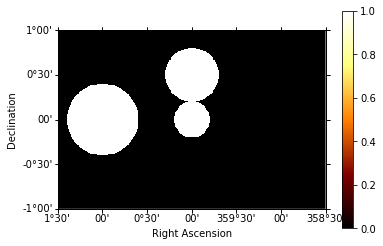

In [23]:
"""Example how to make an exclusion mask for multiple regions"""
from astropy.coordinates import SkyCoord, Angle
from regions import CircleSkyRegion
from gammapy.maps import Map

regions = [
    CircleSkyRegion(center=SkyCoord(0, 0, unit='deg'), radius=Angle('0.2 deg')),
    CircleSkyRegion(center=SkyCoord(0, 0.5, unit='deg'), radius=Angle('0.3 deg')),
    CircleSkyRegion(center=SkyCoord(1.0, 0, unit='deg'), radius=Angle('0.4 deg')),
]

# Make an exclusion map, initially an empty map (zero filled)
m = Map.create(npix=(300, 200), binsz=0.01, dtype=bool)

# For each region, make a mask, then OR it with the total mask
for region in regions:
    m.data += m.geom.get_region_mask_array(region)

print(m.data.dtype)

import matplotlib.pyplot as plt
m.plot(add_cbar=True);
plt.savefig('exclusion.png')